## Central Limit Theorem

## Preparation of Population Dataset

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from statistics import mean
import random
from scipy import stats
import math

In [2]:
hospital_data = pd.read_csv('training_v2.csv',encoding='unicode_escape')
heights_data = hospital_data[['height']].copy()
heights = heights_data.dropna()
heights = heights.reset_index(drop=True)

The dataset was saved locally to create this notebook. The dataset called "training_v2.csv" can be downloaded from the following website: 
https://www.kaggle.com/c/widsdatathon2020/data

## Examination of Population Dataset

### Population Statistics

In [3]:
heights.describe()

,height
count,90379.000000
mean,169.641588
std,10.795378
min,137.200000
25%,162.500000
50%,170.100000
75%,177.800000
max,195.590000


As shown by the table above, the mean, standard deviation and median of the population dataset are 169.6, 10.80 and 170.1 respectively. We will be comparing the sample statistics to the population statistics so we can determine how accurately we can calculate the population statistics using sample statistics for each statistic type. 

In [4]:
population_mean = float(heights.mean())
population_sd = float(heights.std())
population_median=float(heights.median())

### Distribution of Population Dataset

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'height values (cm)'),
 Text(0.5, 1.0, 'Population Dataset, standard deviation = 10.80, mean = 169.64')]

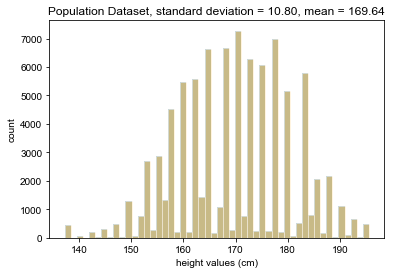

In [5]:
sns.distplot(heights,kde=False,hist=True)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(heights,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Population Dataset, standard deviation = {population_sd:.2f}, mean = {population_mean:.2f}'),xlabel='height values (cm)',ylabel='count')

As shown by the figure above, the distribution of the population dataset is not normal. 

## Generating Sample Datasets 
We need to generate sample datasets from the population datasets so we can use those samples to estimate the mean, standard deviation and median of the population dataset.

In [6]:
heights_list = list(heights['height'])

In [7]:
def random_sample_generator(population,sample_no,sample_size):
    """
    generate random samples for a population, number of samples and sample size.
    the poplulation value is a list and the number of samples and sample size are integers. 
    """
    
    sample_dict={}
    sample = 1 
    while sample < sample_no+1:
        sample_list = random.sample(population,sample_size)
        sample_dict[sample]=sample_list
        sample += 1 
    return sample_dict

## Calculating Means from Sample Datasets 
We can use the function below to calculate the mean from each sample dataset.

In [8]:
def calc_sample_means(sample_dict):
    """
    calculate the mean of the sample values stored in the dictionary. 
    """
    sample_means=[]
    for i in range(1,len(sample_dict)+1):
        sample_values = sample_dict.get(i)
        sample_mean = mean(sample_values)
        sample_means.append(sample_mean)
    return sample_means

## Mean Random Sampling Analysis

### 1000 Samples of Size 40
We will start with a sample size of 40 and 1000 samples. 

In [9]:
sample_dictionary_1000_40 = random_sample_generator(heights_list,1000,40)

In [10]:
sample_mean_values_1000_40 = calc_sample_means(sample_dictionary_1000_40)
sample_means_df_1000_40 = pd.DataFrame(data=sample_mean_values_1000_40,columns=['means'])

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'mean height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Means, Sample Count = 1000, Sample Size = 40, Standard Error = 1.71')]

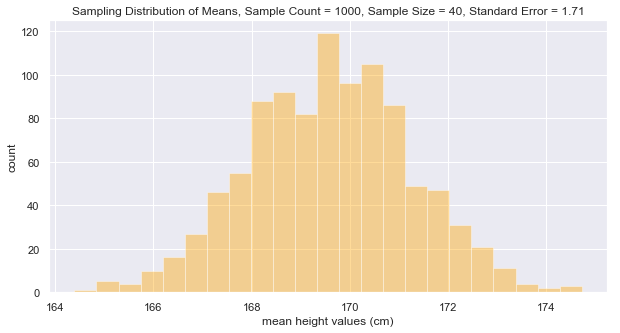

In [11]:
standard_error_40 = population_sd/math.sqrt(40)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_means_df_1000_40,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Means, Sample Count = 1000, Sample Size = 40, Standard Error = {standard_error_40:.2f}'),xlabel='mean height values (cm)',ylabel='count')

#### Proximity of Sample Mean to Population Mean

In [12]:
sample_mean_1000_40 = mean(sample_mean_values_1000_40)
print(f'The sample mean is: {sample_mean_1000_40:.2f}. The population mean is: {population_mean:.2f}')
print(f'The difference between the population mean and the sample mean is {(population_mean-sample_mean_1000_40):.2f}')
print(f'The sampling error is: {standard_error_40:.2f}')

The sample mean is: 169.59. The population mean is: 169.64
The difference between the population mean and the sample mean is 0.05
The sampling error is: 1.71


### 5000 Samples of Size 40

In [13]:
sample_dictionary_5000_40 = random_sample_generator(heights_list,5000,40)

In [14]:
sample_mean_values_5000_40 = calc_sample_means(sample_dictionary_5000_40)
sample_means_df_5000_40 = pd.DataFrame(data=sample_mean_values_5000_40,columns=['means'])

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'mean height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Means, Sample Count = 5000, Sample Size = 40, Standard Error = 1.71')]

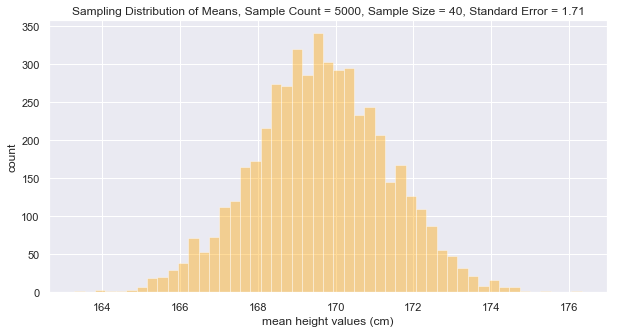

In [15]:
standard_error_40 = population_sd/math.sqrt(40)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_means_df_5000_40,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Means, Sample Count = 5000, Sample Size = 40, Standard Error = {standard_error_40:.2f}'),xlabel='mean height values (cm)',ylabel='count')

#### Proximity of Sample Mean to Population Mean

In [16]:
sample_mean_5000_40 = mean(sample_mean_values_5000_40)
standard_error_40 = population_sd/math.sqrt(40)
print(f'The sample mean is: {sample_mean_5000_40:.2f}. The population mean is: {population_mean:.2f}')
print(f'The difference between the population mean and the sample mean is {(population_mean-sample_mean_5000_40):.2f}')
print(f'The sampling error is: {standard_error_40:.2f}')

The sample mean is: 169.62. The population mean is: 169.64
The difference between the population mean and the sample mean is 0.02
The sampling error is: 1.71


### 10000 Samples of Size 40

In [17]:
sample_dictionary_10000_40 = random_sample_generator(heights_list,10000,40)

In [18]:
sample_mean_values_10000_40 = calc_sample_means(sample_dictionary_10000_40)
sample_means_df_10000_40 = pd.DataFrame(data=sample_mean_values_10000_40,columns=['means'])

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'mean height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Means, Sample Count = 10000, Sample Size = 40, Standard Error = 1.71')]

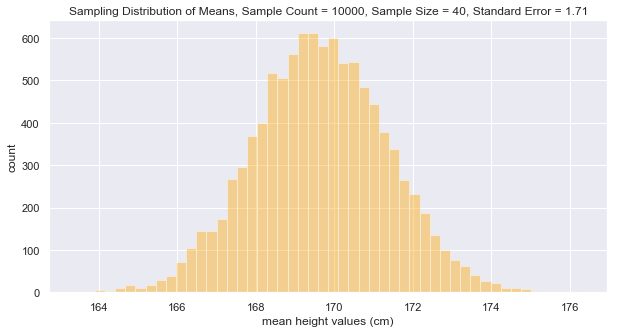

In [19]:
standard_error_40 = population_sd/math.sqrt(40)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_means_df_10000_40,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Means, Sample Count = 10000, Sample Size = 40, Standard Error = {standard_error_40:.2f}'),xlabel='mean height values (cm)',ylabel='count')

#### Proximity of Sample Mean to Population Mean

In [20]:
sample_mean_10000_40 = mean(sample_mean_values_10000_40)
standard_error_40 = population_sd/math.sqrt(40)
print(f'The sample mean is: {sample_mean_10000_40:.2f}. The population mean is: {population_mean:.2f}')
print(f'The difference between the population mean and the sample mean is {(population_mean-sample_mean_10000_40):.2f}')
print(f'The sampling error is: {standard_error_40:.2f}')

The sample mean is: 169.64. The population mean is: 169.64
The difference between the population mean and the sample mean is -0.00
The sampling error is: 1.71


### 5000 Samples of Size 100

In [21]:
sample_dictionary_5000_100 = random_sample_generator(heights_list,5000,100)

In [22]:
sample_mean_values_5000_100 = calc_sample_means(sample_dictionary_5000_100)
sample_means_df_5000_100 = pd.DataFrame(data=sample_mean_values_5000_100,columns=['means'])

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'mean height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Means, Sample Count = 5000, Sample Size = 100, Standard Error = 1.08')]

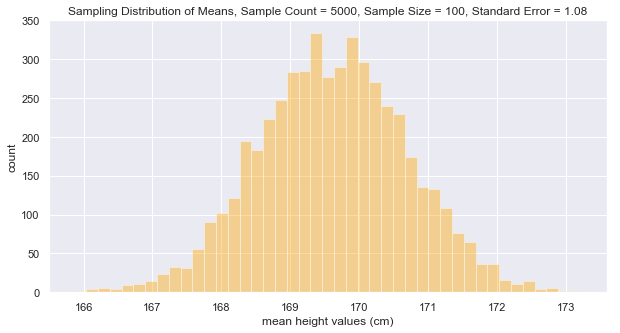

In [23]:
standard_error_100 = population_sd/math.sqrt(100)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_means_df_5000_100,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Means, Sample Count = 5000, Sample Size = 100, Standard Error = {standard_error_100:.2f}'),xlabel='mean height values (cm)',ylabel='count')

#### Proximity of Sample Mean to Population Mean

In [24]:
sample_mean_5000_100 = mean(sample_mean_values_5000_100)
standard_error_100 = population_sd/math.sqrt(100)
print(f'The sample mean is: {sample_mean_5000_100:.2f}. The population mean is: {population_mean:.2f}')
print(f'The difference between the population mean and the sample mean is {(population_mean-sample_mean_5000_100):.2f}')
print(f'The sampling error is: {(standard_error_100):.2f}')

The sample mean is: 169.61. The population mean is: 169.64
The difference between the population mean and the sample mean is 0.03
The sampling error is: 1.08


### 5000 Samples of Size 250

In [25]:
sample_dictionary_5000_250 = random_sample_generator(heights_list,5000,250)

In [26]:
sample_mean_values_5000_250 = calc_sample_means(sample_dictionary_5000_250)
sample_means_df_5000_250 = pd.DataFrame(data=sample_mean_values_5000_250,columns=['means'])

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'mean height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Means, Sample Count = 5000, Sample Size = 250, Standard Error = 0.68')]

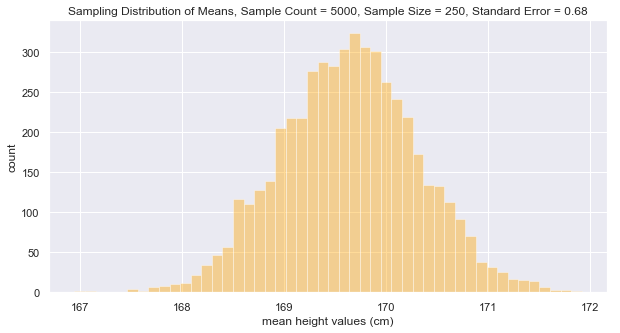

In [27]:
standard_error_250 = population_sd/math.sqrt(250)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_means_df_5000_250,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Means, Sample Count = 5000, Sample Size = 250, Standard Error = {standard_error_250:.2f}'),xlabel='mean height values (cm)',ylabel='count')

In [28]:
sample_mean_5000_250 = mean(sample_mean_values_5000_250)
standard_error_250 = population_sd/math.sqrt(250)
print(f'The sample mean is: {sample_mean_5000_250:.2f}. The population mean is: {population_mean:.2f}')
print(f'The difference between the population mean and the sample mean is {(population_mean-sample_mean_5000_250):.2f}')
print(f'The sampling error is: {standard_error_250:.2f}')

The sample mean is: 169.64. The population mean is: 169.64
The difference between the population mean and the sample mean is 0.00
The sampling error is: 0.68


### 10000 Samples of Size 100

In [29]:
sample_dictionary_10000_100 = random_sample_generator(heights_list,10000,100)

In [30]:
sample_mean_values_10000_100 = calc_sample_means(sample_dictionary_10000_100)
sample_means_df_10000_100 = pd.DataFrame(data=sample_mean_values_10000_100,columns=['means'])

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'mean height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Means, Sample Count = 10000, Sample Size = 100, Standard Error = 1.08')]

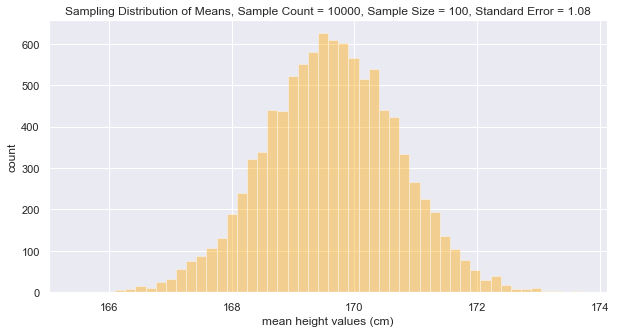

In [31]:
standard_error_100 = population_sd/math.sqrt(100)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_means_df_10000_100,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Means, Sample Count = 10000, Sample Size = 100, Standard Error = {standard_error_100:.2f}'),xlabel='mean height values (cm)',ylabel='count')

In [32]:
sample_mean_10000_100 = mean(sample_mean_values_10000_100)
standard_error_100 = population_sd/math.sqrt(100)
print(f'The sample mean is: {sample_mean_10000_100:.2f}. The population mean is: {population_mean:.2f}')
print(f'The difference between the population mean and the sample mean is {(population_mean-sample_mean_10000_100):.2f}')
print(f'The sampling error is: {standard_error_100:.2f}')

The sample mean is: 169.63. The population mean is: 169.64
The difference between the population mean and the sample mean is 0.01
The sampling error is: 1.08


### 10000 Samples of Size 250

In [33]:
sample_dictionary_10000_250 = random_sample_generator(heights_list,10000,250)

In [34]:
sample_mean_values_10000_250 = calc_sample_means(sample_dictionary_10000_250)
sample_means_df_10000_250 = pd.DataFrame(data=sample_mean_values_10000_250,columns=['means'])

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'mean height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Means, Sample Count = 10000, Sample Size = 250, Standard Error = 0.68')]

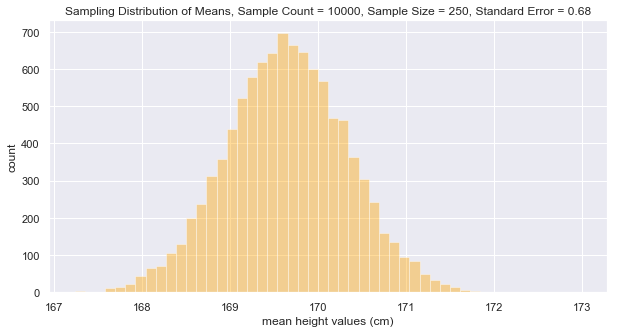

In [35]:
standard_error_250 = population_sd/math.sqrt(250)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_means_df_10000_250,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Means, Sample Count = 10000, Sample Size = 250, Standard Error = {standard_error_250:.2f}'),xlabel='mean height values (cm)',ylabel='count')

In [36]:
sample_mean_10000_250 = mean(sample_mean_values_10000_250)
standard_error_250 = population_sd/math.sqrt(250)
print(f'The sample mean is: {sample_mean_10000_250:.2f}. The population mean is: {population_mean:.2f}')
print(f'The difference between the population mean and the sample mean is {(population_mean-sample_mean_10000_250):.2f}')
print(f'The sampling error is: {standard_error_250:.2f}')

The sample mean is: 169.64. The population mean is: 169.64
The difference between the population mean and the sample mean is 0.00
The sampling error is: 0.68


## Median Random Sampling Analysis

In [37]:
def calc_sample_median(sample_dict):
    """
    calculate the mean of the sample values stored in the dictionary. 
    """
    sample_medians=[]
    for i in range(1,len(sample_dict)+1):
        sample_values = sample_dict.get(i)
        sample_median = np.median(sample_values)
        sample_medians.append(sample_median)
    return sample_medians

### 1000 Samples of Size 40

In [38]:
sample_dictionary_1000_40 = random_sample_generator(heights_list,1000,40)

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'median height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Medians, Sample Count = 1000, Sample Size = 40, Standard Error = 1.71')]

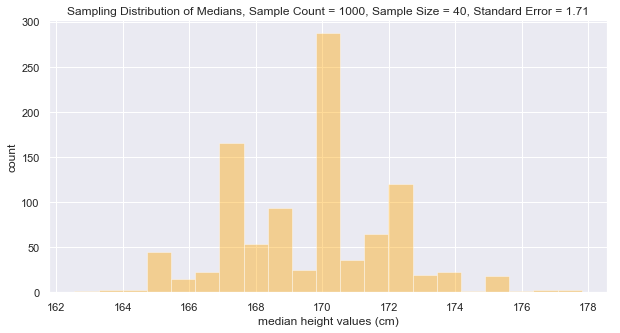

In [39]:
sample_median_values_1000_40 = calc_sample_median(sample_dictionary_1000_40)
sample_median_df_1000_40 = pd.DataFrame(data=sample_median_values_1000_40,columns=['median'])

standard_error_40 = population_sd/math.sqrt(40)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_median_df_1000_40,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Medians, Sample Count = 1000, Sample Size = 40, Standard Error = {standard_error_40:.2f}'),xlabel='median height values (cm)',ylabel='count')

#### Proximity of Estimated Median to Population Median

In [40]:
sample_median_1000_40 = np.median(sample_median_values_1000_40)
standard_error_40 = population_sd/math.sqrt(40)
print(f'The sample median is: {sample_median_1000_40:.2f}. The population mean is: {population_median:.2f}')
print(f'The difference between the population median and the sample median is {(population_median-sample_median_1000_40):.2f}')
print(f'The sampling error is: {standard_error_40:.2f}')

The sample median is: 170.10. The population mean is: 170.10
The difference between the population median and the sample median is 0.00
The sampling error is: 1.71


### 1000 Samples of Size 100

In [41]:
sample_dictionary_1000_100 = random_sample_generator(heights_list,1000,100)

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'median height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Medians, Sample Count = 1000, Sample Size = 100, Standard Error = 1.08')]

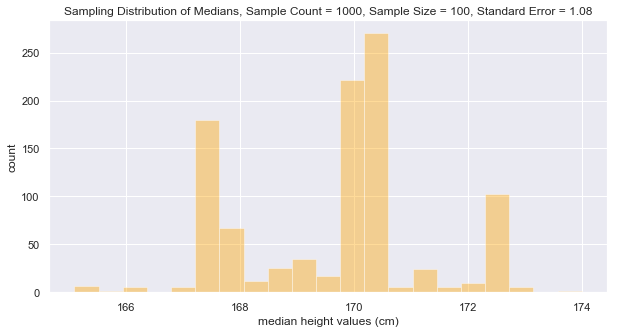

In [42]:
sample_median_values_1000_100 = calc_sample_median(sample_dictionary_1000_100)
sample_median_df_1000_100 = pd.DataFrame(data=sample_median_values_1000_100,columns=['median'])

standard_error_100 = population_sd/math.sqrt(100)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_median_df_1000_100,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Medians, Sample Count = 1000, Sample Size = 100, Standard Error = {standard_error_100:.2f}'),xlabel='median height values (cm)',ylabel='count')

#### Proximity of Estimated Median to Population Median

In [43]:
sample_median_1000_100 = np.median(sample_median_values_1000_100)
standard_error_100 = population_sd/math.sqrt(100)
print(f'The sample median is: {sample_median_1000_100:.2f}. The population mean is: {population_median:.2f}')
print(f'The difference between the population median and the sample median is {(population_median-sample_median_1000_100):.2f}')
print(f'The sampling error is: {standard_error_100:.2f}')

The sample median is: 170.10. The population mean is: 170.10
The difference between the population median and the sample median is 0.00
The sampling error is: 1.08


### 5000 Samples of Size 100

In [44]:
sample_dictionary_5000_100 = random_sample_generator(heights_list,5000,100)

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'median height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Medians, Sample Count = 5000, Sample Size = 100, Standard Error = 1.08')]

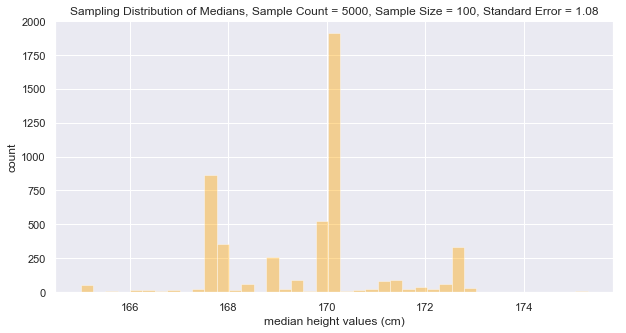

In [45]:
sample_median_values_5000_100 = calc_sample_median(sample_dictionary_5000_100)
sample_median_df_5000_100 = pd.DataFrame(data=sample_median_values_5000_100,columns=['median'])

standard_error_100 = population_sd/math.sqrt(100)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_median_df_5000_100,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Medians, Sample Count = 5000, Sample Size = 100, Standard Error = {standard_error_100:.2f}'),xlabel='median height values (cm)',ylabel='count')

#### Proximity of Estimated Median to Population Median

In [46]:
sample_median_5000_100 = np.median(sample_median_values_5000_100)
standard_error_100 = population_sd/math.sqrt(100)
print(f'The sample median is: {sample_median_5000_100:.2f}. The population mean is: {population_median:.2f}')
print(f'The difference between the population median and the sample median is {(population_median-sample_median_5000_100):.2f}')
print(f'The sampling error is: {standard_error_100:.2f}')

The sample median is: 170.05. The population mean is: 170.10
The difference between the population median and the sample median is 0.05
The sampling error is: 1.08


### 1000 Samples of Size 250

In [47]:
sample_dictionary_1000_250 = random_sample_generator(heights_list,1000,250)

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'median height values (cm)'),
 Text(0.5, 1.0, 'Sampling Distribution of Medians, Sample Count = 1000, Sample Size = 250, Standard Error = 0.68')]

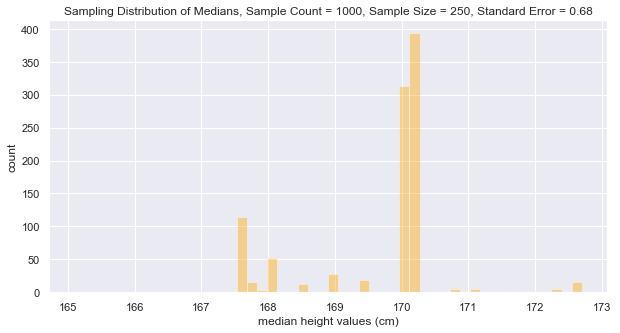

In [48]:
sample_median_values_1000_250 = calc_sample_median(sample_dictionary_1000_250)
sample_median_df_1000_250 = pd.DataFrame(data=sample_median_values_1000_250,columns=['median'])

standard_error_250 = population_sd/math.sqrt(250)
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.distplot(sample_median_df_1000_250,kde=False,hist=True,color = 'orange')
ax.set(title=(f'Sampling Distribution of Medians, Sample Count = 1000, Sample Size = 250, Standard Error = {standard_error_250:.2f}'),xlabel='median height values (cm)',ylabel='count')

#### Proximity of Estimated Median to Population Median

In [49]:
sample_median_1000_250 = np.median(sample_median_values_1000_250)
standard_error_250 = population_sd/math.sqrt(250)
print(f'The sample median is: {sample_median_1000_250:.2f}. The population mean is: {population_median:.2f}')
print(f'The difference between the population median and the sample median is {(population_median-sample_median_1000_250):.2f}')
print(f'The sampling error is: {standard_error_250:.2f}')

The sample median is: 170.05. The population mean is: 170.10
The difference between the population median and the sample median is 0.05
The sampling error is: 0.68


## Standard Deviation Random Sample Analysis

In [50]:
def repeated_random_sampling_stds(samp_n, popul_data, samp_s):
    '''
    Select samp_n elements randomly from a given population and calculate the sample's standard deviation.
    Repeat this process for samp_n times.
    @param samp_n: sampling number, i.e., the number that the random sampling will be done
    @param popul_data: the given population
    @param samp_s: sample size,the number of the items which will be choosen from a population in each sampling
    @return a list containing samp_n length floating point value, each of which is every sample's standard deviation.
    '''
    
    samp_stds = []
    for i in range(samp_n):
        r_samp = random.sample(popul_data, samp_s)
        samp_stds.append(statistics. pstdev(r_samp))
        print
    return samp_stds

In [51]:
def data_distribution (data, samp_n, samp_s, samp_std_mean, samp_std_std):
    '''
    Return the distribution of sample's median.
    @param data: the given data
    @param samp_n: sampling number
    @param samp_s: sample size
    @param samp_std_mean: the average of the given data
    @param samp_std_std: the standard error of the given data
    @return: a histgram
    '''
    
    sns.set_style('darkgrid')
    hist = sns.distplot(data, hist=True, kde=False, 
             bins=int(180/5), color = 'orange')
    plt.title(f'Sampling distribution of standard deviation, '+
              f'sample count ={samp_n}, sample size = {samp_s}, '+
              f'mean = {samp_std_mean:.2f}, standard error = {samp_std_std:.2f}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    sns.set(rc={'figure.figsize':(10,5)})
    return

### 100 Samples of Size 40


est_popul_std_100_40 = 10.62



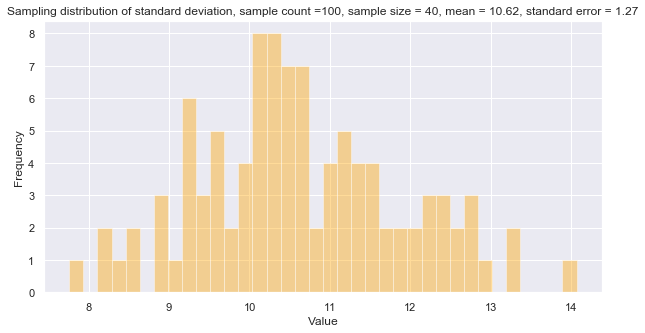

In [52]:
popul_data = heights_list
samp_n = 100
samp_s = 40
samp_stds_100_40 = repeated_random_sampling_stds(samp_n, popul_data, samp_s)
est_std_100_40 = np.mean(samp_stds_100_40)
samp_std_std_100_40 = statistics.pstdev(samp_stds_100_40)
print()
print(f'est_popul_std_100_40 = {est_std_100_40:.2f}')
print()
data_distribution(samp_stds_100_40, samp_n, samp_s, est_std_100_40, samp_std_std_100_40)

In [53]:
print()
print(f'The sampling number and sample size are set as 100 and 40 respectively. '+
      f"The sample's standard deviation has a mean of {est_std_100_40:.2f} "+ 
      f'and a standard error of {samp_std_std_100_40:.2f}. '+
    f"The esimation of population's standard deviation is {est_std_100_40:.2f}.")
print()


The sampling number and sample size are set as 100 and 40 respectively. The sample's standard deviation has a mean of 10.62 and a standard error of 1.27. The esimation of population's standard deviation is 10.62.



### 1000 Samples of Size 40


est_popul_std_1000_40 = 10.57



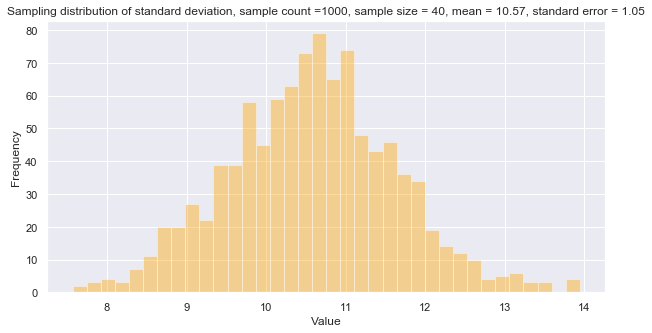

In [54]:
popul_data = heights_list
samp_n = 1000
samp_s = 40
samp_stds_1000_40 = repeated_random_sampling_stds(samp_n, popul_data, samp_s)
est_std_1000_40 = np.mean(samp_stds_1000_40)
samp_std_std_1000_40 = statistics.pstdev(samp_stds_1000_40)
print()
print(f'est_popul_std_1000_40 = {est_std_1000_40:.2f}')
print()
data_distribution(samp_stds_1000_40, samp_n, samp_s, est_std_1000_40, samp_std_std_1000_40)

In [55]:
print()
print(f'The sampling number and sample size are set as 1000 and 40 respectively. '+
      f"The sample's standard deviation has a mean of {est_std_1000_40:.2f} "+ 
      f'and a standard error of {samp_std_std_1000_40:.2f}. '+
    f"The esimation of population's standard deviation is {est_std_1000_40:.2f}.")
print()


The sampling number and sample size are set as 1000 and 40 respectively. The sample's standard deviation has a mean of 10.57 and a standard error of 1.05. The esimation of population's standard deviation is 10.57.



### 5000 Samples of Size 40


est_popul_std_5000_40 = 10.61



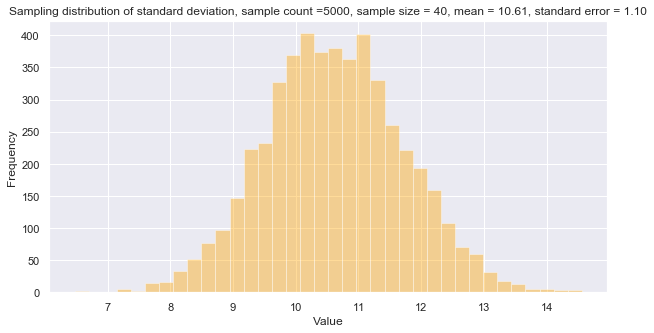

In [56]:
popul_data = heights_list
samp_n = 5000
samp_s = 40
samp_stds_5000_40 = repeated_random_sampling_stds(samp_n, popul_data, samp_s)
est_std_5000_40 = np.mean(samp_stds_5000_40)
samp_std_std_5000_40 = statistics.pstdev(samp_stds_5000_40)
print()
print(f'est_popul_std_5000_40 = {est_std_5000_40:.2f}')
print()
data_distribution(samp_stds_5000_40, samp_n, samp_s, est_std_5000_40, samp_std_std_5000_40)

In [57]:
print()
print(f'The sampling number and sample size are set as 5000 and 40 respectively. '+
      f"The sample's standard deviation has a mean of {est_std_5000_40:.2f} "+ 
      f'and a standard error of {samp_std_std_5000_40:.2f}. '+
    f"The esimation of population's standard deviation is {est_std_5000_40:.2f}.")
print()


The sampling number and sample size are set as 5000 and 40 respectively. The sample's standard deviation has a mean of 10.61 and a standard error of 1.10. The esimation of population's standard deviation is 10.61.



### 10000 Samples of Size 40


est_popul_std_10000_40 = 10.62



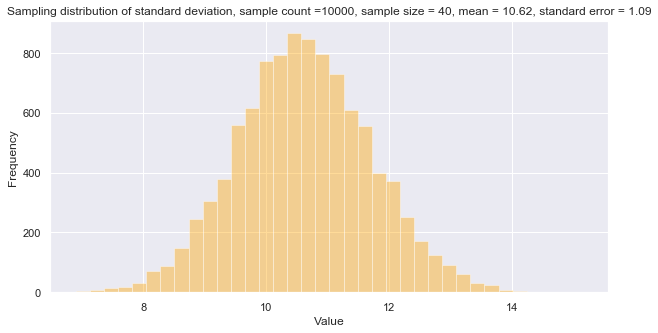

In [58]:
popul_data = heights_list
samp_n = 10000
samp_s = 40
samp_stds_10000_40 = repeated_random_sampling_stds(samp_n, popul_data, samp_s)
est_std_10000_40 = np.mean(samp_stds_10000_40)
samp_std_std_10000_40 = statistics.pstdev(samp_stds_10000_40)
print()
print(f'est_popul_std_10000_40 = {est_std_10000_40:.2f}')
print()
data_distribution(samp_stds_10000_40, samp_n, samp_s, est_std_10000_40, samp_std_std_10000_40)

In [59]:
print()
print(f'The sampling number and sample size are set as 10000 and 40 respectively. '+
      f"The sample's standard deviation has a mean of {est_std_10000_40:.2f} "+ 
      f'and a standard error of {samp_std_std_10000_40:.2f}. '+
    f"The esimation of population's standard deviation is {est_std_10000_40:.2f}.")
print()


The sampling number and sample size are set as 10000 and 40 respectively. The sample's standard deviation has a mean of 10.62 and a standard error of 1.09. The esimation of population's standard deviation is 10.62.



<p>The resuls for the first three samples indicate that the estimation of population's standard deviation is becoming closer to the actual value. The graph of sampling distribution is becoming smoother and increasingly like the normal distribution as the sampling number increases. <p>
<p>However, compared with the third sample, the estimations of the fourth is not better. But the sampling number is much larger, 5 times of that of the third sample, which means a huge cost. As a result, we choose 5000 as the sampling number when we do trials to find out the suitable sample size in the following analysis.<p>

### 5000 Samples of Size of 100


est_popul_std_5000_100 = 10.72



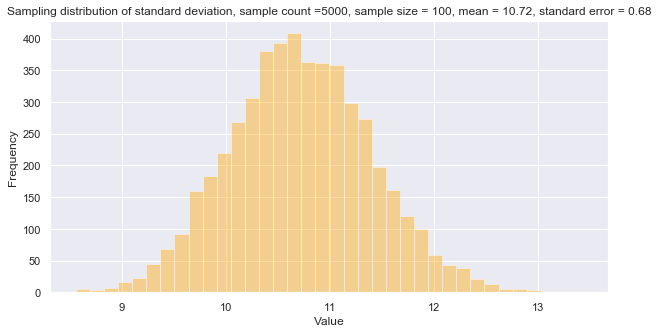

In [60]:
popul_data = heights_list
samp_n = 5000
samp_s = 100
samp_stds_5000_100 = repeated_random_sampling_stds(samp_n, popul_data, samp_s)
est_std_5000_100 = np.mean(samp_stds_5000_100)
samp_std_std_5000_100 = statistics.pstdev(samp_stds_5000_100)
print()
print(f'est_popul_std_5000_100 = {est_std_5000_100:.2f}')
print()
data_distribution(samp_stds_5000_100, samp_n, samp_s, est_std_5000_100, samp_std_std_5000_100)

In [61]:
print()
print(f'The sampling number and sample size are set as 5000 and 100 respectively. '+
      f"The sample's standard deviation has a mean of {est_std_5000_100:.2f} "+ 
      f'and a standard error of {samp_std_std_5000_100:.2f}. '+
    f"The esimation of population's standard deviation is {est_std_5000_100:.2f}.")
print()


The sampling number and sample size are set as 5000 and 100 respectively. The sample's standard deviation has a mean of 10.72 and a standard error of 0.68. The esimation of population's standard deviation is 10.72.



### 5000 Samples of Size 500


est_popul_std_5000_500 = 10.78



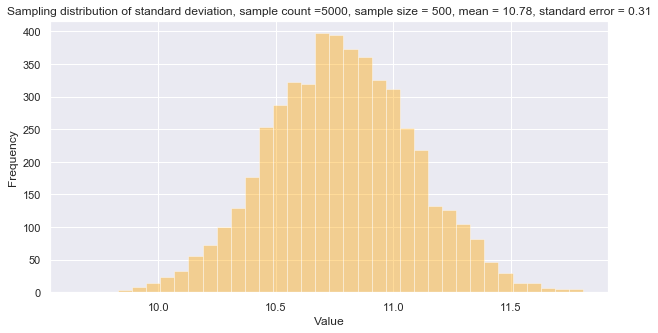

In [62]:
popul_data = heights_list
samp_n = 5000
samp_s = 500
samp_stds_5000_500 = repeated_random_sampling_stds(samp_n, popul_data, samp_s)
est_std_5000_500 = np.mean(samp_stds_5000_500)
samp_std_std_5000_500 = statistics.pstdev(samp_stds_5000_500)
print()
print(f'est_popul_std_5000_500 = {est_std_5000_500:.2f}')
print()
data_distribution(samp_stds_5000_500, samp_n, samp_s, est_std_5000_500, samp_std_std_5000_500)

In [63]:
print()
print(f'The sampling number and sample size are set as 5000 and 500 respectively. '+
      f"The sample's standard deviation has a mean of {est_std_5000_500:.2f} "+ 
      f'and a standard error of {samp_std_std_5000_500:.2f}. '+
    f"The esimation of population's standard deviation is {est_std_5000_500:.2f}.")
print()


The sampling number and sample size are set as 5000 and 500 respectively. The sample's standard deviation has a mean of 10.78 and a standard error of 0.31. The esimation of population's standard deviation is 10.78.



### 5000 Samples of Size 1000


est_popul_std_5000_1000 = 10.79



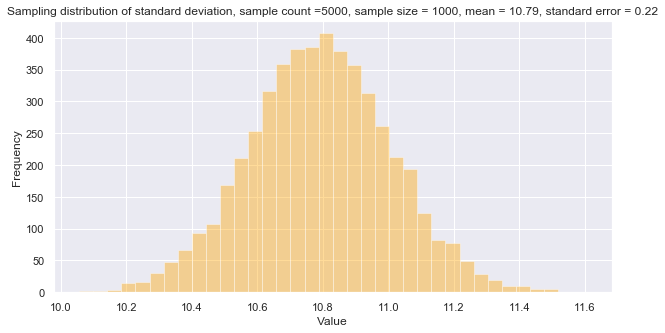

In [64]:
popul_data = heights_list
samp_n = 5000
samp_s = 1000
samp_stds_5000_1000 = repeated_random_sampling_stds(samp_n, popul_data, samp_s)
est_std_5000_1000 = np.mean(samp_stds_5000_1000)
samp_std_std_5000_1000 = statistics.pstdev(samp_stds_5000_1000)
print()
print(f'est_popul_std_5000_1000 = {est_std_5000_1000:.2f}')
print()
data_distribution(samp_stds_5000_1000, samp_n, samp_s, est_std_5000_1000, samp_std_std_5000_1000)

In [65]:
print()
print(f'The sampling number and sample size are set as 5000 and 1000 respectively. '+
      f"The sample's standard deviation has a mean of {est_std_5000_1000:.2f} "+ 
      f'and a standard error of {samp_std_std_5000_1000:.2f}. '+
    f"The esimation of population's standard deviation is {est_std_5000_1000:.2f}.")
print()


The sampling number and sample size are set as 5000 and 1000 respectively. The sample's standard deviation has a mean of 10.79 and a standard error of 0.22. The esimation of population's standard deviation is 10.79.



<p>The results of the sample distributions with 5000 samples of size 40, 5000 samples of size 100 and 5000 samples of size 500 indicate that the estimation of population's standard deviation is becoming closer to the actual value. The standard error of sampling distribution is increasingly small, meaning that the standard deviation of each sample is increasingly concentrated. <p>
<p>However, from the result of the 5000 samples of size 1000, we can see that the estimation of population's standard deviation is not much better than that of 5000 samples of size 500 even though its sample size is a twice times of 5000 samples of size 500. Given the potential cost, we think the best choice is 5000 samples of size 500, that is, a sampling number of 5000 and a sample size of 500.

## Results Summary

### Estimation of Population Mean

As shown below, the sample number and size with the closest estimaion of the population mean was the last case with 10,000 samples and a sample size of 250. Using a sample number of 20 and a low sample size of 40 also produced a close estimation but the distribution of the sample means was not normal and it was decided that 20 samples was not representative of the population dataset which has almost 100,000 values so it was not considered. 

In [66]:
print(f'The Difference Between the Population and Estimated Mean (Population Mean - Estimated Mean):')
print(f'1000 Samples of Size 40: {(population_mean-sample_mean_1000_40):.3f}')
print(f'5000 Samples of Size 40: {(population_mean-sample_mean_5000_40):.3f}')
print(f'10000 Samples of Size 40: {(population_mean-sample_mean_10000_40):.3f}')
print(f'5000 Samples of Size 100: {(population_mean-sample_mean_5000_100):.3f}')
print(f'5000 Samples of Size 250: {(population_mean-sample_mean_5000_250):.3f}')
print(f'10000 Samples of Size 100: {(population_mean-sample_mean_10000_100):.3f}')
print(f'10000 Samples of Size 250: {(population_mean-sample_mean_10000_250):.3f}')

The Difference Between the Population and Estimated Mean (Population Mean - Estimated Mean):
1000 Samples of Size 40: 0.049
5000 Samples of Size 40: 0.022
10000 Samples of Size 40: -0.001
5000 Samples of Size 100: 0.027
5000 Samples of Size 250: 0.001
10000 Samples of Size 100: 0.013
10000 Samples of Size 250: 0.001


### Estimation of Population Median

In [67]:
print(f'The Difference Between the Population and Estimated Median (Population Median - Estimated Median:')
print(f'1000 Samples of Size 40: {(population_median-sample_median_1000_40):.3f}')
print(f'1000 Samples of Size 100: {(population_median-sample_median_1000_100):.3f}')
print(f'5000 Samples of Size 100: {(population_median-sample_median_5000_100):.3f}')
print(f'1000 Samples of Size 250: {(population_median-sample_median_1000_250):.2f}')
#add 10,000 values to show that we couldn't get it to be normally distributed

The Difference Between the Population and Estimated Median (Population Median - Estimated Median:
1000 Samples of Size 40: 0.000
1000 Samples of Size 100: 0.000
5000 Samples of Size 100: 0.050
1000 Samples of Size 250: 0.05


### Estimation of Population Standard Deviation

In [68]:
print(f'The Difference Between the Population and Estimated Median (Population Standard Deviation - Estimated Standard Deviation:')

est_std_5000_1000

print(f'100 Samples of Size 40: {(population_sd-est_std_100_40):.3f}')
print(f'1000 Samples of Size 40: {(population_sd-est_std_1000_40):.3f}')
print(f'5000 Samples of Size 40: {(population_sd-est_std_5000_40):.3f}')
print(f'5000 Samples of Size 100: {(population_sd-est_std_5000_100):.3f}')
print(f'5000 Samples of Size 500: {(population_sd-est_std_5000_500):.3f}')

The Difference Between the Population and Estimated Median (Population Standard Deviation - Estimated Standard Deviation:
100 Samples of Size 40: 0.178
1000 Samples of Size 40: 0.223
5000 Samples of Size 40: 0.181
5000 Samples of Size 100: 0.078
5000 Samples of Size 500: 0.016


## Discussion

#### What were the results? What inferences were you able to make? Did you notice anything unusual that needed further exploration or research to explain?

#### Which population probability distributions are more challenging to estimate their parameters with random sampling? Given what the Central Limit Theorem says about the distributions of the sample statistics, would a normally distributed population be easiest? Would other distributions be harder to make good parameter estimates? If so, why?

Given what the Central Limit Theorem says about the distributions of the sample statistics, it wouldn't matter what the distribution of the population is. You would need to select the correct sample size and number of samples. 

#### What is a good compromise between the number of samples and the sample size? In the real world (such as professional polling services), it is expensive to do sampling. But you still want the most accurate estimates.

#### From the charts in the February 27th set of lecture notes, it appears that estimating the standard deviation parameter is more challenging than estimating the population mean and median. Is that generally true for all population distributions? If so, why?

#### For a fixed sample count, what sample sizes are required for the sample distributions to approach normal for each parameter estimation? Is it possible to rank the parameters by the required sample sizes when estimating using random sampling?